In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loan_approval_dataset.csv to loan_approval_dataset (1).csv


In [ ]:
# Loading the dataset
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
# Checking the shape of the dataset
df.shape

(4269, 13)

Removing the unnecessary load_id as it is an identifier column

In [ ]:
df.drop(columns='loan_id', inplace=True)

In [ ]:
# Checking for null/missing values
df.isnull().sum()

,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0
luxury_assets_value,0


In [ ]:
# Checking the data types of the columns
df.dtypes

,0
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64
luxury_assets_value,int64


The dataset contains four types of assets: Residential, Commercial, Luxury, and Bank. I am grouping these assets into two categories: Movable and Immovable. Residential and Commercial assets will be classified as Immovable, while Luxury and Bank assets will be classified as Movable.

In [ ]:
# Movable Assets
df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']

#Immovable Assets
df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']

In [ ]:
# Drop columns
df.drop(columns=[' bank_asset_value',' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value' ], inplace=True)

Descriptive Statistics

In [ ]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07


In [ ]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000


### Exploratory Data Analysis

Exploratory Data Analysis (EDA) involves examining the distribution of each variable, exploring the relationship between independent variables and the target variable, and analyzing correlations among the variables. Visualizations help identify trends, patterns, and potential hidden insights within the data.

**Number of Dependents**

Text(0.5, 1.0, 'Number of Dependents')

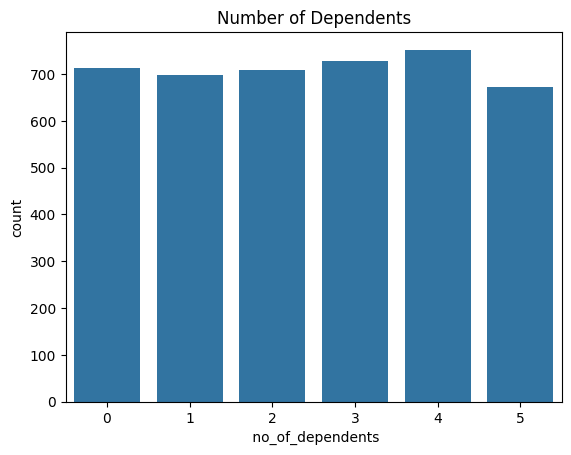

In [ ]:
sns.countplot(x = ' no_of_dependents', data = df).set_title('Number of Dependents')

This graph illustrates the number of dependents for each loan applicant. While most categories show similar counts, there are slightly more applicants with 3 or 4 dependents. As the number of dependents increases, the disposable income of the applicant decreases, suggesting that applicants with 0 or 1 dependent may have a higher likelihood of loan approval.

**Education and Income**

<Axes: xlabel=' education', ylabel=' income_annum'>

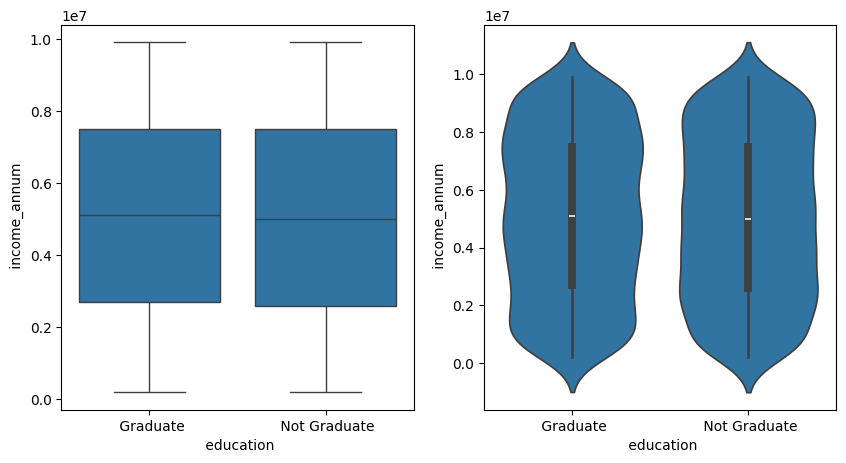

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.boxplot(x = ' education', y = ' income_annum', data = df, ax=ax[0])
sns.violinplot(x = ' education', y = ' income_annum', data = df, ax=ax[1])

These two graphs; a boxplot and a violin plot, visualize applicants’ education levels alongside their annual income. The boxplot indicates that graduates and non-graduates have nearly the same median income, with only a slight increase for graduates. The violin plot shows the income distribution for both groups: non-graduate applicants have an even distribution between 2,000,000 and 8,000,000, while graduates show a more uneven distribution, with most applicants earning between 6,000,000 and 8,000,000. Given the minimal difference in annual income between graduates and non-graduates, education appears to have little impact on loan approval.

**Employment Status and Education**

Text(0.5, 1.0, 'Self Employed')

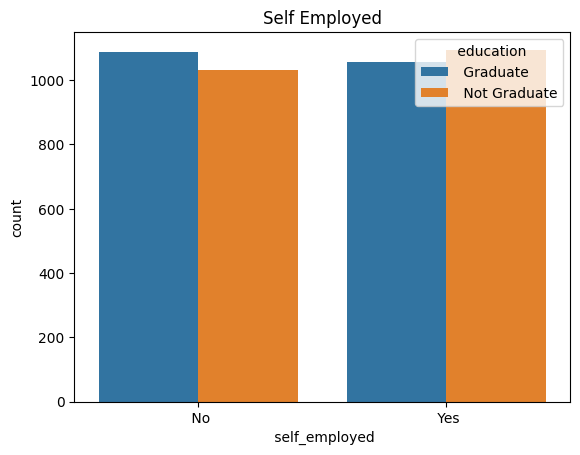

In [ ]:
sns.countplot(x=' self_employed', data = df, hue = ' education').set_title('Self Employed')

This graph shows the number of self-employed applicants in relation to their education. Most graduate applicants are not self-employed, whereas a majority of non-graduates are self-employed. This suggests that graduate applicants are more likely to be salaried employees, while non-graduates are more likely to have self-employment income. Employment type could influence loan approval, as salaried employees typically have a stable income and may be more likely to repay loans, whereas self-employed applicants may have variable income. However, it is also possible that some self-employed applicants earn more than salaried employees and are equally capable of repaying loans. Employment type is therefore an important factor to consider when predicting loan approval.

**Loan Amount and Tenure**

Text(0.5, 1.0, 'Loan Amount vs. Loan Term')

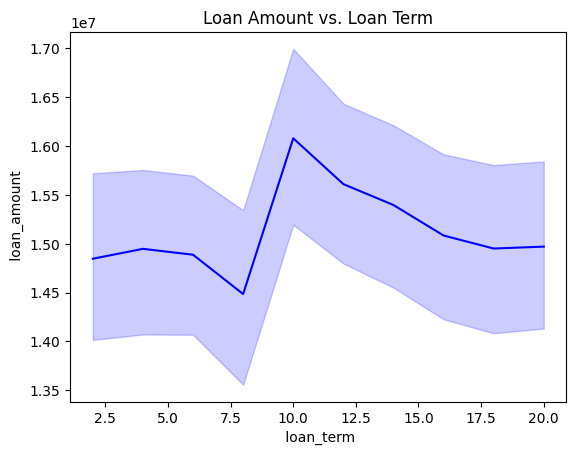

In [ ]:
sns.lineplot(x = ' loan_term', y = ' loan_amount', data = df, color = 'blue').set_title('Loan Amount vs. Loan Term')

The line plot illustrates the relationship between loan tenure and loan amount. Loans with tenures of 2.5 to 7.5 years generally range from 1,400,000 to 15,500,000. In contrast, loans with a tenure of 10 years show a noticeably higher loan amount.

**CIBIL Score Distribution**

<Axes: xlabel=' cibil_score', ylabel='Count'>

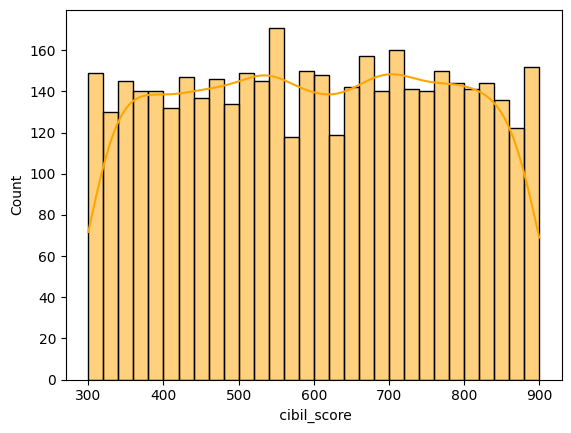

In [ ]:
sns.histplot(df[' cibil_score'], bins = 30, kde = True, color = 'orange')

Before looking at the cibil score, lets have a look at the cibil score ranges and their meaning.

| Cibil Score | Meaning    |
|------------|------------|
| 300-549    | Poor       |
| 550-649    | Fair       |
| 650-749    | Good       |
| 750-799    | Very Good  |
| 800-900    | Excellent  |




*   List item

*   List item
*   List item


*   List item


Source:[ godigit.com](URL)


Using the above table as a reference for Cibil score quality, the majority of customers have a Cibil score below 649, which can negatively impact their loan applications. However, a significant number of applicants have a Cibil score above 649, which is favorable for the bank. The bank can target these customers by offering priority services, special offers, or discounts to encourage them to take loans. Based on this observation, a hypothesis can be formulated: customers with a Cibil score above 649 are more likely to have their loan applications approved.

**Asset Distribution**

<Axes: xlabel='Immovable_assets', ylabel='Count'>

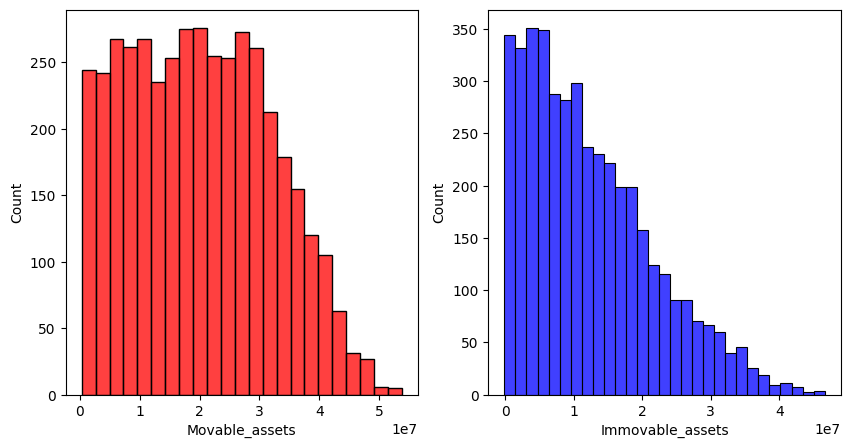

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df['Movable_assets'], ax=ax[0], color='red')
sns.histplot(df['Immovable_assets'], ax=ax[1], color='blue')

**Impact of Assets on Loan Approval**

Assets serve as collateral for the bank, providing assurance that borrowers can repay their loans. In this analysis, assets are grouped into movable (bank and luxury assets) and immovable (residential and commercial properties).

The distribution of movable assets shows that most applicants possess less than 30 million, with fewer applicants in higher-value ranges. For immovable assets, the majority hold under 15 million, and the number of applicants declines sharply for values above 20 million.

During the exploratory data analysis, the characteristics of the dataset have been examined, and initial patterns and hypotheses have been identified. To validate these insights, the next step is to explore how these asset categories relate to the likelihood of loan approval.

**Number of Dependants Vs Loan Status**

Text(0.5, 1.0, 'Loan Status by Education')

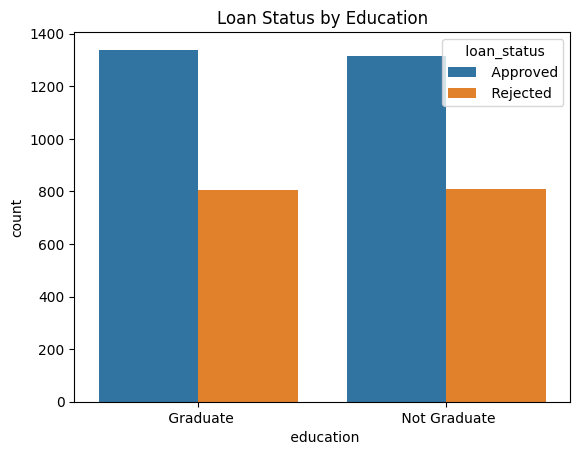

In [ ]:
sns.countplot(x = ' education', hue = ' loan_status', data = df).set_title('Loan Status by Education')

The hypothesis that education does not significantly influence loan approval is supported by the graph. The difference in approval and rejection counts between graduate and non-graduate applicants is minimal and not substantial enough to indicate a strong effect.

**Annual Income vs Loan Status**

<Axes: xlabel=' loan_status', ylabel=' income_annum'>

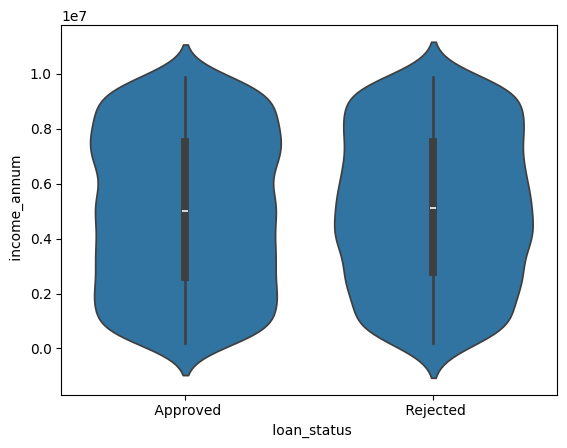

In [ ]:
sns.violinplot(x=' loan_status', y=' income_annum', data=df)

Overall, there is no major difference in annual incomes between applicants with approved and rejected loans. However, applicants with approved loans generally have higher annual incomes, as shown in the violin plot, where a higher density of approved applicants is observed around an annual income of 8 million.

**Loan amount & tenure Vs Loan Status**

<Axes: xlabel=' loan_term', ylabel=' loan_amount'>

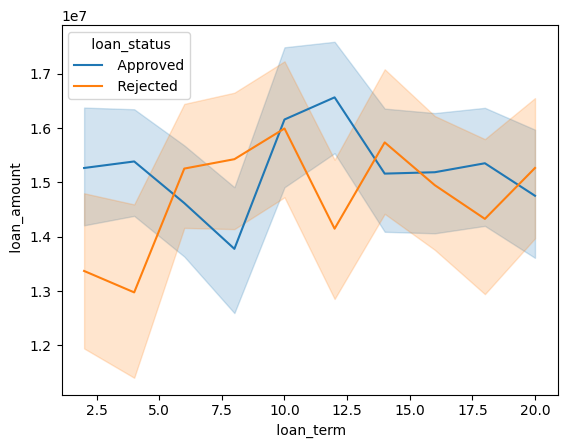

In [ ]:
sns.lineplot(x=' loan_term', y=' loan_amount', data=df, hue=' loan_status')

This graph illustrates the relationship between loan amount, loan tenure, and loan status. Approved loans generally have higher amounts and shorter repayment tenures, while rejected loans tend to have lower amounts and longer tenures. This pattern may reflect the bank’s policy of rejecting loans with longer repayment periods or smaller amounts, as such loans may be less profitable or carry higher risk.

**CIBIL Score Vs Loan Status**

<Axes: xlabel=' loan_status', ylabel=' cibil_score'>

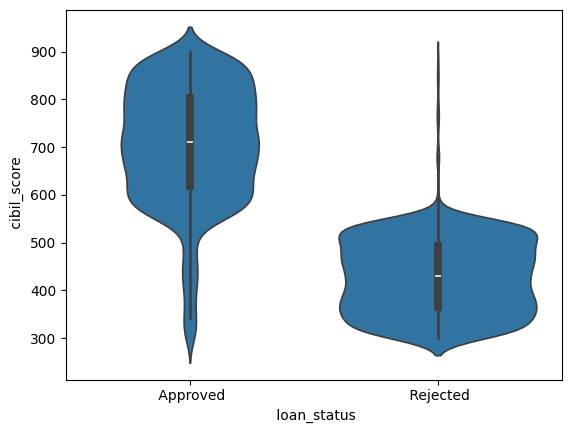

In [ ]:
sns.violinplot(x=' loan_status', y=' cibil_score', data=df)

The hypothesis that a higher Cibil score increases the likelihood of loan approval is supported by the violin plot. Approved loans are concentrated among applicants with Cibil scores above 600, while the distribution for rejected loans is more spread out, with many scores below 550. This confirms the observation that a majority of applicants have poor or fair Cibil scores, which negatively affects loan approval. Therefore, having a Cibil score above 600 significantly improves the chances of loan approval.

**Assets Vs Loan Status**

<Axes: xlabel='Immovable_assets', ylabel='Count'>

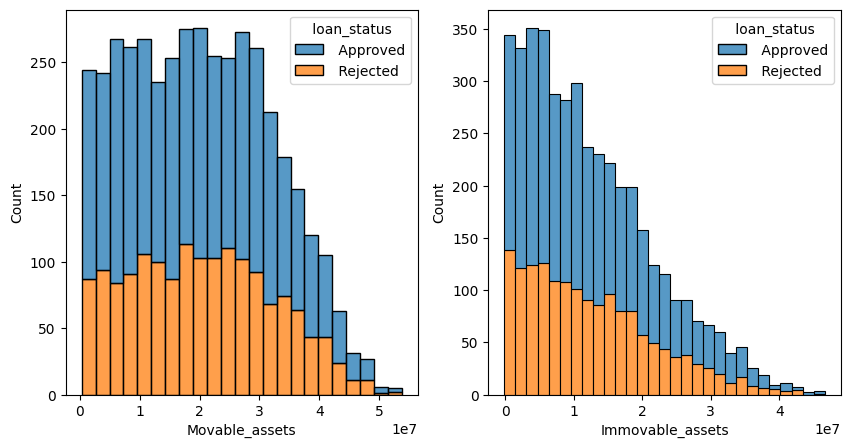

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(x  = 'Movable_assets', data = df, ax=ax[0], hue = ' loan_status', multiple='stack')
sns.histplot(x =  'Immovable_assets', data = df, ax=ax[1], hue  = ' loan_status', multiple='stack')

Assets serve as collateral for the bank when issuing loans. The two graphs illustrate the relationship between movable and immovable assets and loan status. Both graphs indicate that as asset values increase, the likelihood of loan approval rises while the probability of rejection decreases. Additionally, the graphs show that applicants generally possess more movable assets than immovable assets.

### Data Preprocessing II ###

**Label Encoding the categorical variables**

In [ ]:
# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Convert to string first, then strip spaces
df['education'] = df['education'].astype(str).str.strip().map({'Not Graduate':0, 'Graduate':1})
df['self_employed'] = df['self_employed'].astype(str).str.strip().map({'No':0, 'Yes':1})
df['loan_status'] = df['loan_status'].astype(str).str.strip().map({'Rejected':0, 'Approved':1})


In [ ]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000


### Coorelation Matrix Heatmap

<Axes: >

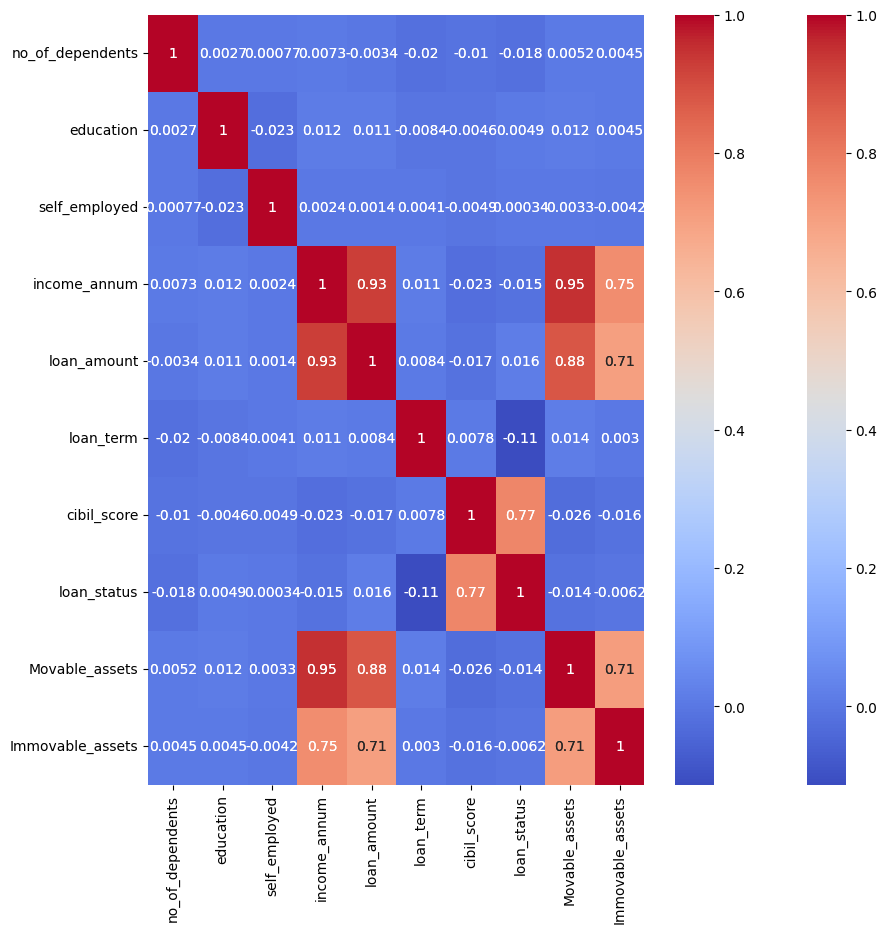

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

The correlation matrix heatmap highlights several strong relationships:

- Movable Assets and Immovable Assets

- Income and Movable Assets

- Income and Immovable Assets

- Movable Assets and Loan Amount

- Immovable Assets and Loan Amount

- Loan Status and Cibil Score

- Loan Amount and Income

The strong correlation between movable and immovable assets is expected, as both are components of total assets; individuals with higher movable assets tend to have higher immovable assets and vice versa. Similarly, higher income is associated with greater assets.

The next step is to explore the correlations between assets and loan amount, as well as between income and loan amount. The relationship between loan status and Cibil score has already been examined in the previous section.

**Assets Vs Loan Amount**

Text(0.5, 1.0, 'Immovable_assets vs loan_amount')

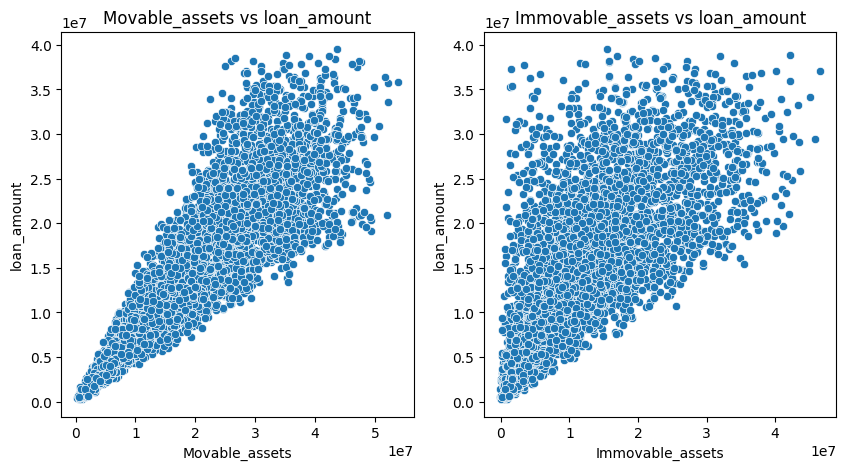

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
df.columns = df.columns.str.strip()
sns.scatterplot(x='Movable_assets', y = 'loan_amount', data = df, ax=ax[0]).set_title('Movable_assets vs loan_amount')
sns.scatterplot(x='Immovable_assets', y = 'loan_amount', data = df, ax=ax[1]).set_title('Immovable_assets vs loan_amount')

The loan amount is positively correlated with both movable and immovable assets. Higher asset values are associated with larger loan amounts issued by the bank.

**Loan Amount Vs Income**

<Axes: xlabel='income_annum', ylabel='loan_amount'>

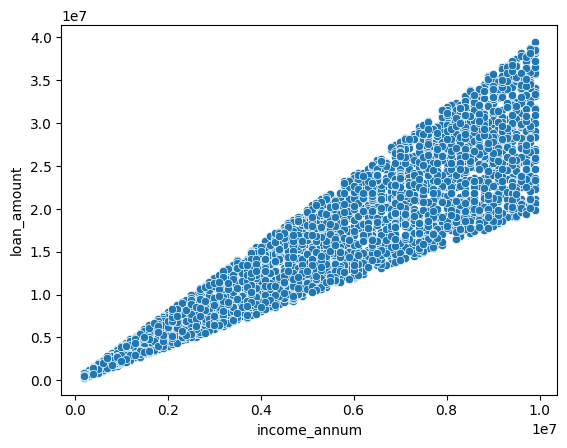

In [ ]:
df.columns = df.columns.str.strip()
sns.scatterplot(x='income_annum', y = 'loan_amount', data = df)

There is a direct relationship between the loan amount and the applicant's annual income. Higher income levels are associated with larger loan amounts, as the applicant’s income is a key factor in determining the appropriate loan size.

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('loan_status', axis=1), df['loan_status'], test_size=0.2, random_state=42)

### Model Building
The following machine learning models will be used to predict loan approval status:

- Decision Tree Classifier
- Random Forest Classifier

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree object
dtree = DecisionTreeClassifier()

In [ ]:
# Trainign the model using the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Training Accuracy
dtree.score(X_train, y_train)

1.0

In [ ]:
# Predicting the Loan Approval Status
dtree_pred = dtree.predict(X_test)

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier()

In [ ]:
# Training the model using the training data
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Training Accuracy
rfc.score(X_train, y_train)

1.0

In [ ]:
# Predicting the Loan Approval Status
rfc_pred = rfc.predict(X_test)

### Model Evalution ###

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, ax=ax[0]).set_title('Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, ax=ax[1]).set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

The confusion matrix heatmap shows the counts of true positives and true negatives for both machine learning models. The Decision Tree classifier has a total of 17 false positive and false negative predictions, while the Random Forest classifier has 21. Based on these results, the Decision Tree classifier demonstrates slightly better accuracy compared to the Random Forest classifier.

**Distribution Plot**

/tmp/ipython-input-3908899067.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x=y_test, hist=False, color="r", label="Actual Value")
/tmp/ipython-input-3908899067.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=dtree_pred, hist=False, color="b", label="Fitted Val

Text(0.5, 1.0, 'Actual vs Fitted Values for Decsion Tree Classfier')

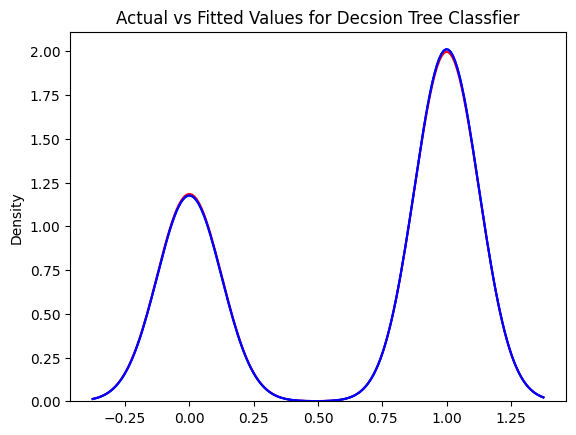

In [ ]:
ax = sns.distplot(x=y_test, hist=False, color="r", label="Actual Value")
sns.distplot(x=dtree_pred, hist=False, color="b", label="Fitted Values", ax=ax)
plt.title('Comparison of Actual and Fitted Values for Decision Tree Classifier')
sns.distplot( x = dtree_pred, hist = False, color = "b", label = "Fitted Values", ax = ax)
plt.title('Actual vs Fitted Values for Decsion Tree Classfier')

/tmp/ipython-input-1367839858.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
/tmp/ipython-input-1367839858.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( x = rfc_pred, hist = False, color = "b", lab

Text(0.5, 1.0, 'Actual vs Fitted Values for Random Forest Classfier')

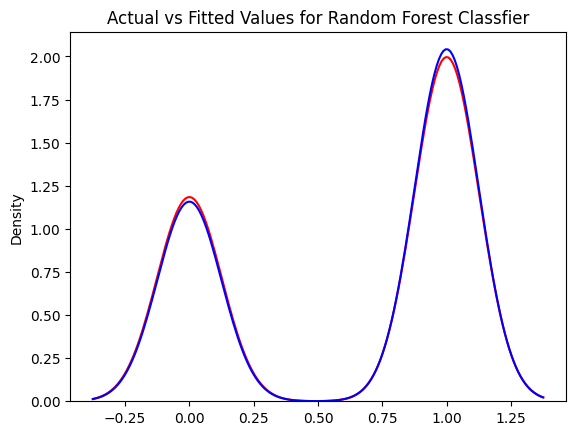

In [ ]:
ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
sns.distplot( x = rfc_pred, hist = False, color = "b", label = "Fitted Values", ax = ax)
plt.title('Actual vs Fitted Values for Random Forest Classfier')

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dtree_pred))
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       318
           1       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       318
           1       0.97      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Decision Tree Classifier
print('R2 score: ', r2_score(y_test, dtree_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, dtree_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, dtree_pred))
print('\n')

# Random Forest Classifier
print("R2 score: ", r2_score(y_test, rfc_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, rfc_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, rfc_pred))


R2 score:  0.9248451140523796
Mean Squared Error:  0.01756440281030445
Mean Absolute Error:  0.01756440281030445


R2 score:  0.8947831596733314
Mean Squared Error:  0.02459016393442623
Mean Absolute Error:  0.02459016393442623


Based on the evaluation metrics, visualizations, and model comparison, it can be concluded that the Decision Tree classifier performs better overall and is the more suitable model for predicting loan approval status.

### Conclusion

The exploratory data analysis indicates that several factors play a significant role in loan approval:

- CIBIL Score: Applicants with higher CIBIL scores have a greater likelihood of loan approval.

- Number of Dependents: A higher number of dependents is associated with lower chances of approval due to reduced disposable income.

- Assets: Applicants with higher movable and immovable asset values are more likely to receive approval, as assets provide security to the bank.

- Loan Amount and Tenure: Higher loan amounts combined with shorter tenures are more commonly approved than lower amounts with longer repayment periods.

For the predictive modeling, both the Decision Tree Classifier and the Random Forest Classifier were evaluated. The models performed well, achieving accuracies of 91.4% and 89.4%, respectively. However, the Decision Tree classifier delivered slightly better performance and is therefore the preferred model for predicting loan approval status.